# **Prediction of CO2 Emissions using Linear Regression, Polynomial Regression, KNN, and Lazy Regressor**

# Variables
* MODELYEAR e.g. 2014
* MAKE e.g. Acura
* MODEL e.g. ILX
* VEHICLE CLASS e.g. SUV
* ENGINE SIZE e.g. 4.7
* CYLINDERS e.g 6
* TRANSMISSION e.g. A6
* FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
* FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
* FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
* CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

# Importing libraries

In [1]:
!pip install lazypredict

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import seaborn as sns
import numpy as np
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from sklearn.linear_model import LinearRegression
from lazypredict.Supervised import LazyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Importing dataset

In [3]:
def load_dataframe(dataset):
    dataframe = pd.read_csv(dataset)
    dataframe.columns = [col.lower() for col in dataframe.columns]
    
    return dataframe

df = load_dataframe('/kaggle/input/fuel-consumption-co2/fuel_consumption_CO2.csv')
df.head()

,modelyear,make,model,vehicleclass,enginesize,cylinders,transmission,fueltype,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions
0,2014,ACURA,ILX,COMPACT,2.00,4,AS5,Z,9.90,6.70,8.50,33,196
1,2014,ACURA,ILX,COMPACT,2.40,4,M6,Z,11.20,7.70,9.60,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.50,4,AV7,Z,6.00,5.80,5.90,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.50,6,AS6,Z,12.70,9.10,11.10,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.50,6,AS6,Z,12.10,8.70,10.60,27,244


# Let's see the general picture

In [4]:
def check_dataframe(dataframe, head=5):
    print(' head '.upper().center(150, "*"))
    display(dataframe.head(head))
    print('\n',' tail '.upper().center(150, "*"))
    display(dataframe.tail(head))
    print('\n',' shape '.upper().center(150, "*"))
    print(dataframe.shape)
    print('\n',' dtype '.upper().center(150, "*"))
    print(dataframe.dtypes)
    print('\n',' columns '.upper().center(150, "*"))
    print(dataframe.columns)
    print('\n',' dataset info '.upper().center(150, "*"))
    print(dataframe.info())
    print('\n',' any null values '.upper().center(150, "*"))
    print(dataframe.isnull().values.any())
    print('\n',' null values '.upper().center(150, "*"))
    print(dataframe.isnull().sum().sort_values(ascending=False))
    print('\n',' descriptive statistics '.upper().center(150, "*"))
    display(dataframe.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_dataframe(df)

************************************************************************ HEAD ************************************************************************


,modelyear,make,model,vehicleclass,enginesize,cylinders,transmission,fueltype,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions
0,2014,ACURA,ILX,COMPACT,2.00,4,AS5,Z,9.90,6.70,8.50,33,196
1,2014,ACURA,ILX,COMPACT,2.40,4,M6,Z,11.20,7.70,9.60,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.50,4,AV7,Z,6.00,5.80,5.90,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.50,6,AS6,Z,12.70,9.10,11.10,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.50,6,AS6,Z,12.10,8.70,10.60,27,244



 ************************************************************************ TAIL ************************************************************************


,modelyear,make,model,vehicleclass,enginesize,cylinders,transmission,fueltype,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.00,6,AS6,X,13.40,9.80,11.80,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.20,6,AS6,X,13.20,9.50,11.50,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.00,6,AS6,X,13.40,9.80,11.80,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.20,6,AS6,X,12.90,9.30,11.30,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.20,6,AS6,X,14.90,10.20,12.80,22,294



 *********************************************************************** SHAPE ************************************************************************
(1067, 13)

 *********************************************************************** DTYPE ************************************************************************
modelyear                     int64
make                         object
model                        object
vehicleclass                 object
enginesize                  float64
cylinders                     int64
transmission                 object
fueltype                     object
fuelconsumption_city        float64
fuelconsumption_hwy         float64
fuelconsumption_comb        float64
fuelconsumption_comb_mpg      int64
co2emissions                  int64
dtype: object

 ********************************************************************** COLUMNS ***********************************************************************
Index(['modelyear', 'make', 'model', 'vehiclecla

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
modelyear,1067.00,2014.00,0.00,2014.00,2014.00,2014.00,2014.00,2014.00,2014.00,2014.00,2014.00,2014.00,2014.00
enginesize,1067.00,3.35,1.42,1.00,1.60,1.60,2.00,3.40,4.30,5.40,6.00,6.53,8.40
cylinders,1067.00,5.79,1.80,3.00,4.00,4.00,4.00,6.00,8.00,8.00,8.00,12.00,12.00
fuelconsumption_city,1067.00,13.30,4.10,4.60,8.10,8.70,10.25,12.60,15.55,18.80,21.10,25.30,30.20
fuelconsumption_hwy,1067.00,9.47,2.79,4.90,6.10,6.60,7.50,8.80,10.85,13.40,14.60,19.23,20.50
fuelconsumption_comb,1067.00,11.58,3.49,4.70,7.23,7.80,9.00,10.90,13.35,16.50,18.00,22.24,25.80
fuelconsumption_comb_mpg,1067.00,26.44,7.47,11.00,16.00,17.00,21.00,26.00,31.00,36.00,39.00,47.00,60.00
co2emissions,1067.00,256.23,63.37,108.00,168.00,182.00,207.00,251.00,294.00,347.00,380.00,415.70,488.00


# Let's separate the categorical, numerical, and cardinal columns

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # categorical variables
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtypes != 'O']
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and dataframe[col].dtypes == 'O']
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # numerical variables
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # reporting section
    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # keeping the calculated values
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols = [col for col in cat_cols if 'model' not in col]  # since it has only one class, 2014
cat_cols
num_cols = [col for col in num_cols if 'co2emissions' not in col] # since it is the dependent variable
num_cols
cat_but_car

Observations: 1067
Variables: 13
cat_cols: 4
num_cols: 6
cat_but_car: 3
num_but_cat: 2


['vehicleclass', 'fueltype', 'cylinders']

['enginesize',
 'fuelconsumption_city',
 'fuelconsumption_hwy',
 'fuelconsumption_comb',
 'fuelconsumption_comb_mpg']

['make', 'model', 'transmission']

# Let's examine the categorical and categorical-cardinal columns

In [6]:
def cat_summary(dataframe, col_name, plot=False):
    print('\n', '#' * 10, col_name.upper(), 10 * '#')
    print(pd.DataFrame({
        col_name.upper(): dataframe[col_name].value_counts(),
        'RATIO (%)': round(100 * (dataframe[col_name].value_counts() / len(dataframe)), 2)
    }))

    if plot:
        fig = px.histogram(dataframe, x=dataframe[col_name])
        fig.show()

for col in cat_cols:
    cat_summary(df, col, plot=True)
print('--'*75)
for col in cat_but_car:
    cat_summary(df, col, plot=True)


 ########## VEHICLECLASS ##########
                          VEHICLECLASS  RATIO (%)
MID-SIZE                           178      16.68
COMPACT                            172      16.12
SUV - SMALL                        154      14.43
SUV - STANDARD                     110      10.31
FULL-SIZE                           86       8.06
TWO-SEATER                          71       6.65
SUBCOMPACT                          65       6.09
PICKUP TRUCK - STANDARD             62       5.81
MINICOMPACT                         47       4.40
STATION WAGON - SMALL               36       3.37
VAN - PASSENGER                     25       2.34
VAN - CARGO                         22       2.06
MINIVAN                             14       1.31
PICKUP TRUCK - SMALL                12       1.12
SPECIAL PURPOSE VEHICLE              7       0.66
STATION WAGON - MID-SIZE             6       0.56



 ########## FUELTYPE ##########
   FUELTYPE  RATIO (%)
X       514      48.17
Z       434      40.67
E        92       8.62
D        27       2.53



 ########## CYLINDERS ##########
    CYLINDERS  RATIO (%)
4         420      39.36
6         356      33.36
8         252      23.62
12         17       1.59
10          9       0.84
5           9       0.84
3           4       0.37


------------------------------------------------------------------------------------------------------------------------------------------------------

 ########## MAKE ##########
               MAKE  RATIO (%)
FORD             90       8.43
CHEVROLET        86       8.06
BMW              64       6.00
MERCEDES-BENZ    59       5.53
GMC              49       4.59
AUDI             49       4.59
TOYOTA           49       4.59
PORSCHE          44       4.12
VOLKSWAGEN       42       3.94
DODGE            39       3.66
MINI             36       3.37
NISSAN           33       3.09
KIA              33       3.09
CADILLAC         32       3.00
JEEP             31       2.91
MAZDA            27       2.53
HYUNDAI          24       2.25
SUBARU           23       2.16
JAGUAR           22       2.06
LEXUS            22       2.06
HONDA            21       1.97
INFINITI         21       1.97
CHRYSLER         19       1.78
LAND ROVER       19       1.78
MITSUBISHI       16       1.50
BUICK         


 ########## MODEL ##########
                       MODEL  RATIO (%)
F150 FFV                   8       0.75
F150 FFV 4X4               8       0.75
ACCORD                     6       0.56
FOCUS FFV                  6       0.56
BEETLE                     6       0.56
...                      ...        ...
Q50 AWD                    1       0.09
Q50                        1       0.09
SONATA HYBRID LIMITED      1       0.09
SONATA HYBRID              1       0.09
XC90 AWD                   1       0.09

[663 rows x 2 columns]



 ########## TRANSMISSION ##########
     TRANSMISSION  RATIO (%)
A6            222      20.81
AS6           189      17.71
M6            141      13.21
A8             87       8.15
AS8            80       7.50
AS7            76       7.12
M5             48       4.50
AV             46       4.31
A4             45       4.22
AM7            34       3.19
A5             30       2.81
A7             12       1.12
AV6            11       1.03
AS5            10       0.94
M7              9       0.84
A9              8       0.75
AM6             6       0.56
AV7             5       0.47
AV8             3       0.28
AS9             2       0.19
AM5             2       0.19
AS4             1       0.09


# Let's examine the numerical variables

In [7]:
def num_summary(dataframe, numerical_col, plot=False):
    print('\n', '#' * 10, numerical_col.upper(), '#' * 10)
    print(pd.DataFrame({
        numerical_col.upper(): round(dataframe[numerical_col].describe().T, 2)
    }))

    if plot:
        fig1 = px.box(dataframe, x=dataframe[numerical_col])
        fig = px.histogram(dataframe, x=dataframe[numerical_col])
        fig1.show()
        fig.show()
        
for col in num_cols:
    num_summary(df, col, plot=True)


 ########## ENGINESIZE ##########
       ENGINESIZE
count     1067.00
mean         3.35
std          1.42
min          1.00
25%          2.00
50%          3.40
75%          4.30
max          8.40



 ########## FUELCONSUMPTION_CITY ##########
       FUELCONSUMPTION_CITY
count               1067.00
mean                  13.30
std                    4.10
min                    4.60
25%                   10.25
50%                   12.60
75%                   15.55
max                   30.20



 ########## FUELCONSUMPTION_HWY ##########
       FUELCONSUMPTION_HWY
count              1067.00
mean                  9.47
std                   2.79
min                   4.90
25%                   7.50
50%                   8.80
75%                  10.85
max                  20.50



 ########## FUELCONSUMPTION_COMB ##########
       FUELCONSUMPTION_COMB
count               1067.00
mean                  11.58
std                    3.49
min                    4.70
25%                    9.00
50%                   10.90
75%                   13.35
max                   25.80



 ########## FUELCONSUMPTION_COMB_MPG ##########
       FUELCONSUMPTION_COMB_MPG
count                   1067.00
mean                      26.44
std                        7.47
min                       11.00
25%                       21.00
50%                       26.00
75%                       31.00
max                       60.00


# Let's examine the categorical and categorical-cardinal variables with the dependent variable

In [8]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print('\n', '#' * 10, categorical_col.upper(), '#' * 10)
    print(pd.DataFrame({
        'TARGET_MEAN': round(dataframe.groupby(categorical_col)[target].mean(), 2)
    }), end='\n\n')

    if plot:
        fig = px.bar(dataframe, x=dataframe[categorical_col], y=dataframe[target])
        fig.show()

for col in cat_cols:
    target_summary_with_cat(df, 'co2emissions', col, plot=True)
print('--'*75)
for col in cat_but_car:
    target_summary_with_cat(df, 'co2emissions', col, plot=True)


 ########## VEHICLECLASS ##########
                          TARGET_MEAN
vehicleclass                         
COMPACT                        216.72
FULL-SIZE                      267.65
MID-SIZE                       226.48
MINICOMPACT                    235.55
MINIVAN                        260.14
PICKUP TRUCK - SMALL           284.25
PICKUP TRUCK - STANDARD        309.10
SPECIAL PURPOSE VEHICLE        235.29
STATION WAGON - MID-SIZE       235.67
STATION WAGON - SMALL          221.11
SUBCOMPACT                     252.62
SUV - SMALL                    242.69
SUV - STANDARD                 307.67
TWO-SEATER                     265.68
VAN - CARGO                    361.50
VAN - PASSENGER                401.00




 ########## FUELTYPE ##########
          TARGET_MEAN
fueltype             
D              227.78
E              291.09
X              241.10
Z              268.53




 ########## CYLINDERS ##########
           TARGET_MEAN
cylinders             
3               144.75
4               201.11
5               223.89
6               260.60
8               331.87
10              394.78
12              375.18



------------------------------------------------------------------------------------------------------------------------------------------------------

 ########## MAKE ##########
               TARGET_MEAN
make                      
ACURA               226.00
ASTON MARTIN        351.57
AUDI                275.69
BENTLEY             359.00
BMW                 252.11
BUICK               235.69
CADILLAC            287.34
CHEVROLET           272.93
CHRYSLER            251.37
DODGE               249.59
FIAT                179.50
FORD                265.96
GMC                 328.24
HONDA               203.71
HYUNDAI             217.25
INFINITI            256.76
JAGUAR              290.68
JEEP                251.77
KIA                 217.52
LAMBORGHINI         394.00
LAND ROVER          307.84
LEXUS               246.50
LINCOLN             268.18
MASERATI            319.67
MAZDA               193.04
MERCEDES-BENZ       277.68
MINI                188.53
MITSUBISHI          210.50
NISSAN    


 ########## MODEL ##########
                 TARGET_MEAN
model                       
1500 (MDS)            326.50
1500 4X4 (MDS)        339.00
1500 4X4 DIESEL       286.00
1500 4X4 FFV          287.50
1500 DIESEL           275.00
...                      ...
Z4 sDRIVE35is         278.00
iQ                    143.00
tC                    207.00
xB                    228.00
xD                    183.00

[663 rows x 1 columns]




 ########## TRANSMISSION ##########
              TARGET_MEAN
transmission             
A4                 329.02
A5                 298.90
A6                 263.05
A7                 314.00
A8                 265.64
A9                 242.62
AM5                147.00
AM6                232.83
AM7                267.85
AS4                228.00
AS5                261.10
AS6                249.67
AS7                274.21
AS8                290.21
AS9                225.00
AV                 183.57
AV6                193.27
AV7                160.20
AV8                213.00
M5                 199.35
M6                 235.72
M7                 251.00



# Let's examine the numerical variables with the dependent variable

In [9]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n")

    if plot:
        fig = px.bar(dataframe, y=dataframe[target], x=dataframe[numerical_col])
        fig.show()
        
for col in num_cols:
    target_summary_with_num(df, 'co2emissions', col, plot=True)

              enginesize
co2emissions            
108                 1.50
110                 1.90
124                 1.40
126                 1.90
129                 1.80
...                  ...
421                 5.95
432                 6.00
435                 6.00
437                 6.80
488                 6.80

[159 rows x 1 columns]



              fuelconsumption_city
co2emissions                      
108                           4.60
110                           4.70
124                           5.60
126                           5.30
129                           5.50
...                            ...
421                          21.70
432                          21.90
435                          22.10
437                          22.30
488                          23.90

[159 rows x 1 columns]



              fuelconsumption_hwy
co2emissions                     
108                          4.90
110                          4.90
124                          5.20
126                          5.75
129                          5.80
...                           ...
421                         14.20
432                         15.00
435                         15.00
437                         14.90
488                         17.80

[159 rows x 1 columns]



              fuelconsumption_comb
co2emissions                      
108                           4.70
110                           4.80
124                           5.40
126                           5.50
129                           5.60
...                            ...
421                          18.30
432                          18.80
435                          18.90
437                          19.00
488                          21.20

[159 rows x 1 columns]



              fuelconsumption_comb_mpg
co2emissions                          
108                              60.00
110                              59.00
124                              52.00
126                              51.00
129                              50.00
...                                ...
421                              15.00
432                              15.00
435                              15.00
437                              15.00
488                              13.00

[159 rows x 1 columns]



# Let's examine the relationship between numerical variables and depentent variable

In [10]:
def scatter_plot_for_num_cols(dataframe, col, target):
    fig = px.scatter(dataframe, x=dataframe[col], y=target, 
                     trendline='ols', 
                     trendline_color_override='green',
                     marginal_x="histogram", 
                     marginal_y="histogram")
    fig.show()
    
for col in num_cols:
    scatter_plot_for_num_cols(df, col, 'co2emissions')

# Let's see the high correlated variables

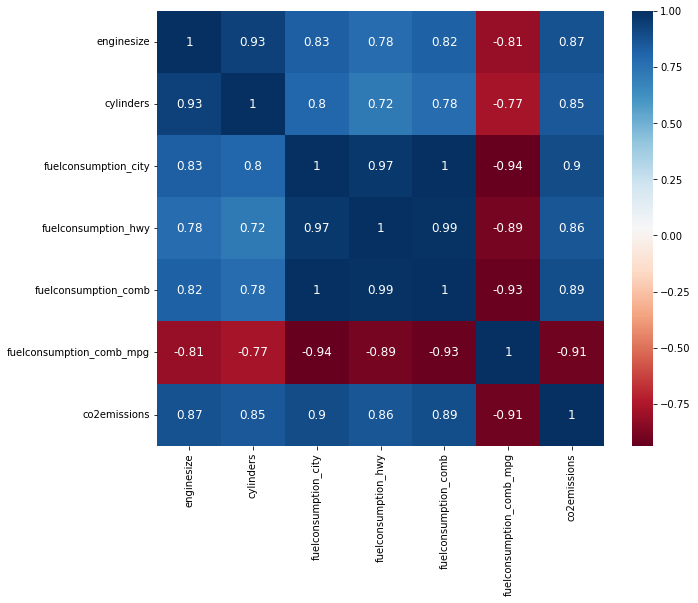

['cylinders',
 'fuelconsumption_hwy',
 'fuelconsumption_comb',
 'fuelconsumption_comb_mpg']

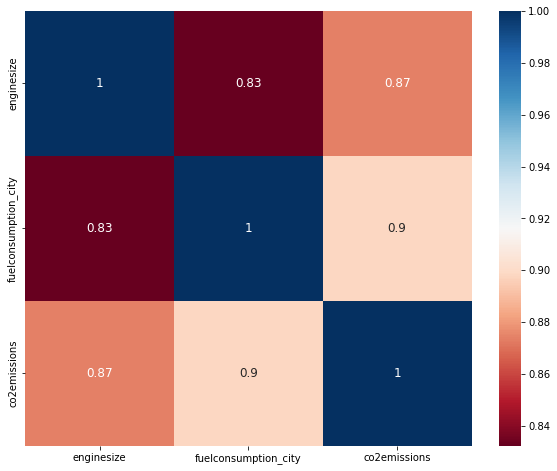

[]

In [11]:
def high_correlated_cols(dataframe, corr_th=0.92, plot=False):
    """
    high_correlated_cols(df_titanic)    # silinmesi gereken kolonlar
    drop_list = high_correlated_cols(df_titanic, plot=True)     # kaydetme islemi
    high_correlated_cols(df_titanic.drop(drop_list, axis=1), plot=True)     # silme islemi
    """
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool_))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

    if plot:
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr, cmap='RdBu', annot=True, annot_kws={'fontsize': 12})
        plt.show(block=True)

    return drop_list

df_ = load_dataframe('/kaggle/input/fuel-consumption-co2/fuel_consumption_CO2.csv')
df = df_.copy()
df = df.drop(['modelyear'], axis=1)
drop_list = high_correlated_cols(df, plot=True)
drop_list
high_correlated_cols(df.drop(drop_list, axis=1), plot=True)

In [12]:
df = df.drop(drop_list, axis=1)
df.head()
df.shape

,make,model,vehicleclass,enginesize,transmission,fueltype,fuelconsumption_city,co2emissions
0,ACURA,ILX,COMPACT,2.00,AS5,Z,9.90,196
1,ACURA,ILX,COMPACT,2.40,M6,Z,11.20,221
2,ACURA,ILX HYBRID,COMPACT,1.50,AV7,Z,6.00,136
3,ACURA,MDX 4WD,SUV - SMALL,3.50,AS6,Z,12.70,255
4,ACURA,RDX AWD,SUV - SMALL,3.50,AS6,Z,12.10,244


(1067, 8)

In [13]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols
num_cols
cat_but_car

Observations: 1067
Variables: 8
cat_cols: 2
num_cols: 3
cat_but_car: 3
num_but_cat: 0


['vehicleclass', 'fueltype']

['enginesize', 'fuelconsumption_city', 'co2emissions']

['make', 'model', 'transmission']

# Basic modeling

## Let's check outliers

In [14]:
def outlier_threshholds(dataframe, col_name, q1=0.05, q3=0.95):
    quantile1 = dataframe[col_name].quantile(q1)
    quantile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quantile3 - quantile1
    up_limit = quantile3 + 1.5 * interquantile_range
    low_limit = quantile1 - 1.5 * interquantile_range

    return low_limit, up_limit


for col in num_cols:
    low_limit, up_limit = outlier_threshholds(df, col)
    print(round(low_limit, 2), round(up_limit, 2))

-5.0 12.6
-11.4 40.6
-150.0 698.0


## Let's find whether there are outliers or not

In [15]:
def check_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_threshholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    print(col, check_outliers(df, col))

enginesize False
fuelconsumption_city False
co2emissions False


### Therefore, there is not outlier according the the determined thresholds (q1=0.05, q3=0.95). Since there is no missing value, we can continue with encoding and standardization. Because of this is a basic study, no feature extraction will be made and we are going to apply a linear regression model to predict the CO2 emissions.

## Let's encode the variables using one-hot encoding

In [16]:
def one_hot_encoder(dataframe, categorical_cols, dropfirst=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=dropfirst)
    return dataframe

ohe_cols = [col for col in df.columns if 20 >= df[col].nunique()]
ohe_cols
df = one_hot_encoder(df, ohe_cols)
df

['vehicleclass', 'fueltype']

,make,model,enginesize,transmission,fuelconsumption_city,co2emissions,vehicleclass_FULL-SIZE,vehicleclass_MID-SIZE,vehicleclass_MINICOMPACT,vehicleclass_MINIVAN,vehicleclass_PICKUP TRUCK - SMALL,vehicleclass_PICKUP TRUCK - STANDARD,vehicleclass_SPECIAL PURPOSE VEHICLE,vehicleclass_STATION WAGON - MID-SIZE,vehicleclass_STATION WAGON - SMALL,vehicleclass_SUBCOMPACT,vehicleclass_SUV - SMALL,vehicleclass_SUV - STANDARD,vehicleclass_TWO-SEATER,vehicleclass_VAN - CARGO,vehicleclass_VAN - PASSENGER,fueltype_E,fueltype_X,fueltype_Z
0,ACURA,ILX,2.00,AS5,9.90,196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,ACURA,ILX,2.40,M6,11.20,221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,ACURA,ILX HYBRID,1.50,AV7,6.00,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,ACURA,MDX 4WD,3.50,AS6,12.70,255,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,ACURA,RDX AWD,3.50,AS6,12.10,244,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,VOLVO,XC60 AWD,3.00,AS6,13.40,271,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1063,VOLVO,XC60 AWD,3.20,AS6,13.20,264,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1064,VOLVO,XC70 AWD,3.00,AS6,13.40,271,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1065,VOLVO,XC70 AWD,3.20,AS6,12.90,260,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


## Let's remove the cardinal variables from the dataset

In [17]:
df = df.drop(cat_but_car, axis=1)
df.head()

,enginesize,fuelconsumption_city,co2emissions,vehicleclass_FULL-SIZE,vehicleclass_MID-SIZE,vehicleclass_MINICOMPACT,vehicleclass_MINIVAN,vehicleclass_PICKUP TRUCK - SMALL,vehicleclass_PICKUP TRUCK - STANDARD,vehicleclass_SPECIAL PURPOSE VEHICLE,vehicleclass_STATION WAGON - MID-SIZE,vehicleclass_STATION WAGON - SMALL,vehicleclass_SUBCOMPACT,vehicleclass_SUV - SMALL,vehicleclass_SUV - STANDARD,vehicleclass_TWO-SEATER,vehicleclass_VAN - CARGO,vehicleclass_VAN - PASSENGER,fueltype_E,fueltype_X,fueltype_Z
0,2.00,9.90,196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.40,11.20,221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.50,6.00,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3.50,12.70,255,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,3.50,12.10,244,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


### Now, all variables are in the numerical form.

## Let's scale the values using robust scaler

### Let's call the function grab_col_names

In [18]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols
num_cols
cat_but_car

Observations: 1067
Variables: 21
cat_cols: 18
num_cols: 3
cat_but_car: 0
num_but_cat: 18


['vehicleclass_FULL-SIZE',
 'vehicleclass_MID-SIZE',
 'vehicleclass_MINICOMPACT',
 'vehicleclass_MINIVAN',
 'vehicleclass_PICKUP TRUCK - SMALL',
 'vehicleclass_PICKUP TRUCK - STANDARD',
 'vehicleclass_SPECIAL PURPOSE VEHICLE',
 'vehicleclass_STATION WAGON - MID-SIZE',
 'vehicleclass_STATION WAGON - SMALL',
 'vehicleclass_SUBCOMPACT',
 'vehicleclass_SUV - SMALL',
 'vehicleclass_SUV - STANDARD',
 'vehicleclass_TWO-SEATER',
 'vehicleclass_VAN - CARGO',
 'vehicleclass_VAN - PASSENGER',
 'fueltype_E',
 'fueltype_X',
 'fueltype_Z']

['enginesize', 'fuelconsumption_city', 'co2emissions']

[]

### Let's remove the dependent variable from the numerical variables

In [19]:
num_cols = [col for col in num_cols if 'co2emissions' not in col]
num_cols

['enginesize', 'fuelconsumption_city']

### Robust scaler

In [20]:
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])
df.head()

,enginesize,fuelconsumption_city,co2emissions,vehicleclass_FULL-SIZE,vehicleclass_MID-SIZE,vehicleclass_MINICOMPACT,vehicleclass_MINIVAN,vehicleclass_PICKUP TRUCK - SMALL,vehicleclass_PICKUP TRUCK - STANDARD,vehicleclass_SPECIAL PURPOSE VEHICLE,vehicleclass_STATION WAGON - MID-SIZE,vehicleclass_STATION WAGON - SMALL,vehicleclass_SUBCOMPACT,vehicleclass_SUV - SMALL,vehicleclass_SUV - STANDARD,vehicleclass_TWO-SEATER,vehicleclass_VAN - CARGO,vehicleclass_VAN - PASSENGER,fueltype_E,fueltype_X,fueltype_Z
0,-0.61,-0.51,196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.43,-0.26,221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.83,-1.25,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.04,0.02,255,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0.04,-0.09,244,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


## Let's select dependent and independent variable

In [21]:
y = df['co2emissions']
X = df.drop('co2emissions', axis=1)

## Let's bulid the train and test sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.shape, X_test.shape

((800, 20), (267, 20))

## Linear regression model 

In [23]:
linear_model = LinearRegression().fit(X_train, y_train)

### Let's find the intercept and coefficients of the model

In [24]:
linear_model.intercept_
linear_model.coef_

274.0640488173897

array([   5.11520812,   90.20585691,   -1.50435003,   -1.92982717,
          1.04858994,    4.26723496,   15.05626908,   12.10440502,
          6.31232565,    1.99578221,    3.3386367 ,   -0.63422612,
          6.67153802,    8.22300341,    0.16083838,   15.38419638,
         13.12815023, -133.27822933,  -24.64799351,  -22.5915882 ])

### Let's caculate the RMSE, MAE and R2 values for train and test sets

In [25]:
# Train set
y_pred = linear_model.predict(X_train)
print('The RMSE value for train set is', round(np.sqrt(mean_squared_error(y_train, y_pred)), 2))
print('The MAE value for train set is', round(mean_absolute_error(y_train, y_pred), 2))
print('The R2 value for train set is', round(r2_score(y_train, y_pred), 4))

fig = px.scatter(x=y_train.values, 
                 y=y_pred, 
                 trendline='ols', 
                 trendline_color_override='green')
fig.show()

The RMSE value for train set is 7.17
The MAE value for train set is 4.91
The R2 value for train set is 0.9872


In [26]:
# Test set
y_hat = linear_model.predict(X_test)
print('The RMSE value for test set is', round(np.sqrt(mean_squared_error(y_test, y_hat)), 2))
print('The MAE value for test set is', round(mean_absolute_error(y_test, y_hat), 2))
print('The R2 value for test set is', round(r2_score(y_test, y_hat), 4))

fig = px.scatter(x=y_test.values, 
                 y=y_hat, 
                 trendline='ols', 
                 trendline_color_override='green')
fig.show()

The RMSE value for test set is 8.12
The MAE value for test set is 5.33
The R2 value for test set is 0.9835


### Let's make a prediction

In [27]:
random_sample_train = X_train.sample(1, random_state=1)
random_sample_test = X_test.sample(1, random_state=1)
print(f'The predicted value of the {X_train.sample(1, random_state=1).index[0]}.index for train set is {round(linear_model.predict(random_sample_train)[0], 2)}')
print(f'The predicted value of the {X_test.sample(1, random_state=1).index[0]}.index for test set is {round(linear_model.predict(random_sample_test)[0], 2)}')

The predicted value of the 1006.index for train set is 337.38
The predicted value of the 148.index for test set is 194.2


## Polynomial regression model

### Train set

In [28]:
reg_model = LinearRegression()
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(X_train)
y_pred_poly = reg_model.fit(x_train_poly, y_train)
print(f'Intercept is {reg_model.intercept_} and Coefficients for train set are {reg_model.coef_}')

Intercept is -5374250025.638203 and Coefficients for train set are [ 5.37425031e+09  1.23361427e+01  9.74401413e+01 -1.46084911e+13
 -7.02975898e+12  1.49657402e+13 -1.06179550e+13 -1.90232576e+12
  5.47253492e+12  2.19406118e+12 -1.39048777e+12  3.77364967e+12
  2.58175088e+12  3.20503012e+12  2.22447871e+12  3.86706430e+12
  1.34936643e+12 -2.22196119e+12  8.59034047e+12  8.75835214e+12
  4.31505976e+12  2.50428520e+00 -8.69986360e+00  4.44158211e+00
  7.08905926e+00 -5.92004482e+00  3.75251758e+00  2.36247882e+00
  7.85563031e+00  4.71945986e+01  1.30759761e+01  4.38715041e+00
  3.30206495e+00  7.27243042e+00  8.52542114e+00  4.53857422e+00
  1.61205521e+01  2.94062500e+01 -1.83083496e+01 -1.78640747e+01
 -1.24780273e+01  7.27148438e+00 -7.81152344e+00 -5.99902344e+00
  1.13874512e+01 -5.69409180e+00  1.48587036e+00  4.66625977e+00
 -5.06273804e+01 -8.40194702e+00 -5.18469238e+00 -5.76757812e+00
 -1.94360352e+00 -6.60156250e+00 -5.85253906e+00 -6.66171265e+00
 -3.65981445e+01 -3.307

In [29]:
# Train set
y_pred_poly = reg_model.predict(x_train_poly)
print('The RMSE value for train set is', round(np.sqrt(mean_squared_error(y_train, y_pred_poly)), 2))
print('The MAE value for train set is', round(mean_absolute_error(y_train, y_pred_poly), 2))
print('The R2 value for train set is', round(r2_score(y_train, y_pred_poly), 4))

# Scatter plot for train set
fig = px.scatter(x=y_train.values, 
                 y=y_pred_poly, 
                 trendline='ols', 
                 trendline_color_override='green')
fig.show()

The RMSE value for train set is 4.41
The MAE value for train set is 3.28
The R2 value for train set is 0.9952


### Test set

In [30]:
lin_model = LinearRegression()
poly_test = PolynomialFeatures(degree=2)
x_test_poly = poly_test.fit_transform(X_test)
y_hat_poly = lin_model.fit(x_test_poly, y_test)
print(f'Intercept is {lin_model.intercept_} and Coefficients for test set are {lin_model.coef_}')

Intercept is 294.76483565769837 and Coefficients for test set are [-6.61076153e-14 -1.32059733e+01  1.33215699e+02  2.20644589e+13
 -9.57717770e+12  1.78306393e+13 -1.27568829e+13 -2.92379049e+12
  1.44448884e+13 -4.79490397e+12  5.75374823e+12 -4.15307628e+12
  2.35984065e+12  1.79328277e+11  2.53251964e+12 -3.17997091e+12
 -3.42750416e+12  6.99338095e+12  1.80165317e+12  1.67189969e+12
  2.17750867e+11 -1.28503542e+00 -3.90431741e+00 -5.17223963e+00
  7.65771530e+00 -3.85630561e+00 -1.59689202e+12 -7.82656269e+11
 -1.27512162e+00  1.70782025e+01 -1.29156453e+11 -1.81046116e+01
  4.87052379e+00  2.42095947e-01  1.24707031e+00 -2.63281250e+00
  3.73206543e+02 -4.37841778e+12  1.81533203e+01  1.08989258e+01
  1.70351562e+01  6.33398438e+00  1.00737305e+01 -6.66210938e+00
  7.28881836e+00  1.75228317e+12 -5.76036040e+10  1.00509033e+01
  1.44884033e+01  7.57782698e+08  1.78076172e+01 -8.32080078e+00
  5.93914795e+00  1.03125000e+00 -1.74804688e+00 -1.03003418e+02
 -3.24432637e+12 -8.4859

In [31]:
# Test set
y_hat_poly = lin_model.predict(x_test_poly)
print('The RMSE value for train set is', round(np.sqrt(mean_squared_error(y_test, y_hat_poly)), 2))
print('The MAE value for train set is', round(mean_absolute_error(y_test, y_hat_poly), 2))
print('The R2 value for train set is', round(r2_score(y_test, y_hat_poly), 4))

# Scatter plot for test set
fig = px.scatter(x=y_test.values, 
                 y=y_hat_poly, 
                 trendline='ols', 
                 trendline_color_override='green')
fig.show()

The RMSE value for train set is 4.13
The MAE value for train set is 3.07
The R2 value for train set is 0.9957


## K-Nearest Neighbor Model

In [32]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
print('The predicted value for train set is', round(knn_model.predict(random_sample_train)[0], 2))
print('The predicted value for test set is', round(knn_model.predict(random_sample_test)[0], 2))

The predicted value for train set is 337.6
The predicted value for test set is 189.2


### Train set

In [33]:
y_pred_knn = knn_model.predict(X_train)
print('The RMSE value for train set is', round(np.sqrt(mean_squared_error(y_train, y_pred_knn)), 2))
print('The MAE value for train set is', round(mean_absolute_error(y_train, y_pred_knn), 2))
print('The R2 value for train set is', round(r2_score(y_train, y_pred_knn), 4))

# Scatter plot for train set
fig = px.scatter(x=y_train.values, 
                 y=y_pred_knn, 
                 trendline='ols', 
                 trendline_color_override='green')
fig.show()

The RMSE value for train set is 10.34
The MAE value for train set is 7.02
The R2 value for train set is 0.9734


### Test set

In [34]:
y_hat_knn = knn_model.predict(X_test)
print('The RMSE value for test set is', round(np.sqrt(mean_squared_error(y_test, y_hat_knn)), 2))
print('The MAE value for test set is', round(mean_absolute_error(y_test, y_hat_knn), 2))
print('The R2 value for test set is', round(r2_score(y_test, y_hat_knn), 4))

# Scatter plot for train set
fig = px.scatter(x=y_test.values, 
                 y=y_hat_knn, 
                 trendline='ols', 
                 trendline_color_override='green')
fig.show()

The RMSE value for test set is 13.77
The MAE value for test set is 9.44
The R2 value for test set is 0.9526


## Lazy Regressor

### On the other hand, Lazy Predict helps to build many basic models without using a lot of code and helps to understand which models work better without any parameter adjustments. Let's write some code and predict CO2 Emissions fastly.

In [35]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, y_train, X_test, y_test)
print(models)

100%|██████████| 42/42 [00:18<00:00,  2.28it/s]

                               Adjusted R-Squared  R-Squared   RMSE  Time Taken
Model                                                                          
XGBRegressor                                 0.99       0.99   5.26        0.59
ExtraTreesRegressor                          0.99       0.99   5.56        0.31
RandomForestRegressor                        0.99       0.99   6.68        0.39
DecisionTreeRegressor                        0.99       0.99   7.01        0.05
BaggingRegressor                             0.99       0.99   7.16        0.04
LGBMRegressor                                0.99       0.99   7.33        0.15
HistGradientBoostingRegressor                0.99       0.99   7.35        0.41
GradientBoostingRegressor                    0.99       0.99   7.37        0.17
ExtraTreeRegressor                           0.98       0.98   7.79        0.03
Lars                                         0.98       0.98   8.12        0.03
TransformedTargetRegressor              

# **Thank you for checking my notebook!**